In [ ]:
import random	#random Function
import numpy as np	#numpy operations
import math		#ceil function

import pandas as pd
import time
from datetime import datetime
from sklearn.metrics import mean_squared_error

#from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
#from bitstring import BitArray
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from sklearn import preprocessing

from keras.callbacks import ModelCheckpoint
import pprint
from keras.callbacks import Callback

np.random.seed(1120)


Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv("/content/Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv")
dataset.head()


,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,Fuel_Pressure,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Flywheel_torque_(after_torque_interventions),Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,Flywheel_torque,Torque_scaling_factor(standardization),Standard_Torque_Ratio,Requested_spark_retard_angle_from_TCU,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Target_engine_speed_used_in_lock-up_module,Glow_plug_control_request,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Wheel_velocity_front_left-hand,Wheel_velocity_rear_right-hand,Wheel_velocity_front_right-hand,Wheel_velocity_rear_left-hand,Torque_converter_turbine_speed_-_Unfiltered,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,0,-0.8,929,5.5,9.0,-5.9,-8.6,95,650,5.5,23.9,2.0,58.2,-5.9,230,1,15,508,0.0,3040,0,0,939.3,0,87,0.0,0.0,0.0,0.0,935.5,1,0,0,0,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,0,-0.8,726,7.0,7.8,1.7,-11.3,95,670,7.0,30.6,2.0,53.9,1.8,230,1,15,508,0.0,3040,0,0,710.0,0,87,0.0,0.0,0.0,0.0,709.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,0,-0.8,685,7.0,7.4,-3.0,-12.8,95,670,7.0,31.8,2.0,53.1,-2.8,230,1,15,508,0.0,3040,0,0,663.3,0,87,0.0,0.0,0.0,0.0,663.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,0,-0.8,675,7.0,6.6,-1.3,-9.8,95,670,7.0,29.0,2.0,53.1,-1.2,230,1,15,508,0.0,3040,0,0,652.5,0,87,0.0,0.0,0.0,0.0,653.0,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,0,-0.8,716,8.2,11.3,-15.6,-7.9,95,670,8.2,30.2,2.0,53.5,-15.9,230,1,15,508,0.0,3040,0,1,692.5,0,87,0.0,0.0,0.0,0.0,693.8,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1


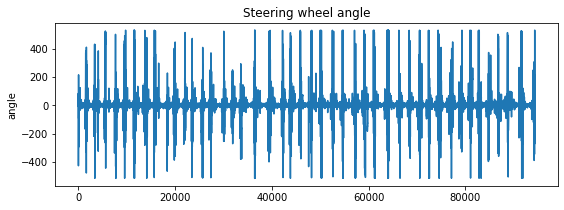

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.title('Steering wheel angle')
#plt.plot(dataset['Fuel_consumption'])
#plt.plot(dataset['Vehicle_speed'])
plt.plot(dataset['Steering_wheel_angle'])

#plt.ylabel('Fuel consumed(ml)')
#plt.ylabel('Speed(km/hr)')
plt.ylabel('angle')
plt.show()

In [ ]:
# iterating the columns 
for col in dataset.columns: 
    print(col) 

Fuel_consumption
Accelerator_Pedal_value
Throttle_position_signal
Short_Term_Fuel_Trim_Bank1
Intake_air_pressure
Filtered_Accelerator_Pedal_value
Absolute_throttle_position
Engine_soacking_time
Inhibition_of_engine_fuel_cut_off
Engine_in_fuel_cut_off
Fuel_Pressure
Long_Term_Fuel_Trim_Bank1
Engine_speed
Engine_torque_after_correction
Torque_of_friction
Flywheel_torque_(after_torque_interventions)
Current_spark_timing
Engine_coolant_temperature
Engine_Idel_Target_Speed
Engine_torque
Calculated_LOAD_value
Minimum_indicated_engine_torque
Maximum_indicated_engine_torque
Flywheel_torque
Torque_scaling_factor(standardization)
Standard_Torque_Ratio
Requested_spark_retard_angle_from_TCU
TCU_requests_engine_torque_limit_(ETL)
TCU_requested_engine_RPM_increase
Target_engine_speed_used_in_lock-up_module
Glow_plug_control_request
Activation_of_Air_compressor
Torque_converter_speed
Current_Gear
Engine_coolant_temperature.1
Wheel_velocity_front_left-hand
Wheel_velocity_rear_right-hand
Wheel_velocity_

In [ ]:
Y=dataset.Class
X=dataset.drop('Class',axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(X)
max_len = len(x_train_scaled)
x_train_scaled

array([[2.45901639e-02, 0.00000000e+00, 5.20000000e-02, ...,
        4.90306561e-01, 0.00000000e+00, 0.00000000e+00],
       [2.22482436e-02, 0.00000000e+00, 6.10000000e-02, ...,
        4.90115557e-01, 3.39328130e-04, 0.00000000e+00],
       [1.99063232e-02, 0.00000000e+00, 5.20000000e-02, ...,
        4.90115557e-01, 6.78656261e-04, 0.00000000e+00],
       ...,
       [3.16159251e-02, 0.00000000e+00, 6.60000000e-02, ...,
        4.80947378e-01, 8.70376654e-01, 1.00000000e+00],
       [3.04449649e-02, 0.00000000e+00, 5.70000000e-02, ...,
        4.80851877e-01, 8.70715982e-01, 1.00000000e+00],
       [2.57611241e-02, 0.00000000e+00, 5.20000000e-02, ...,
        4.80851877e-01, 8.71055310e-01, 1.00000000e+00]])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import decomposition 
print("Shape before transformation - {}".format(np.asarray(x_train_scaled).shape))
pca = decomposition.PCA(n_components=40)
pca.fit(x_train_scaled)
x_pca = pca.transform(x_train_scaled)
print("Shape after transformation - {}".format(x_pca.shape))
x_pca = x_pca.tolist()

Shape before transformation - (94380, 53)
Shape after transformation - (94380, 40)


In [ ]:
#standardize dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_pca)

max_len = len(x_train_scaled)
x_train_scaled

array([[0.0488997 , 0.71026312, 0.31352086, ..., 0.42471446, 0.29290265,
        0.4431661 ],
       [0.05318182, 0.71462319, 0.34057853, ..., 0.42102214, 0.29893549,
        0.45841481],
       [0.05050356, 0.71397933, 0.33655377, ..., 0.42420483, 0.29380804,
        0.46121095],
       ...,
       [0.02129964, 0.07542023, 0.37512868, ..., 0.42158544, 0.28124238,
        0.47032964],
       [0.0203949 , 0.07242722, 0.35826533, ..., 0.42345748, 0.28872508,
        0.46916602],
       [0.02235179, 0.07096164, 0.3489106 , ..., 0.42426373, 0.28888039,
        0.46931153]])

In [ ]:
x_train_scaled[0]

array([0.0488997 , 0.71026312, 0.31352086, 0.92972168, 0.23940928,
       0.26998459, 0.4868664 , 0.31985479, 0.28283609, 0.38842664,
       0.56427863, 0.77977458, 0.29064914, 0.2625123 , 0.73493317,
       0.49008152, 0.43690015, 0.27850712, 0.39959341, 0.5463599 ,
       0.31794993, 0.42833968, 0.40319851, 0.18552895, 0.40825641,
       0.15143344, 0.60031226, 0.26769919, 0.05699009, 0.16529016,
       0.5796162 , 1.        , 0.5872178 , 0.18252862, 0.3832222 ,
       0.58122353, 0.05025085, 0.42471446, 0.29290265, 0.4431661 ])

In [ ]:
#convert Y(output label) to numpy array
array_y=Y.to_numpy()

#convert label class to one hot encoded format
encoder = LabelEncoder()
encoder.fit(array_y)
encoded_Y = encoder.transform(array_y)
encoded_y = np_utils.to_categorical(encoded_Y)
print(encoded_y.shape)

(94380, 10)


In [ ]:
#init the matrix problem
def init(n,pd,l,u,l1,u1,l2,u2,l3,u3):
	x=[]
	for i in range (n):
		x.append([])
		x[i].append(int(l-(l-u)*(random.random())))
		x[i].append(int(l-(l-u)*(random.random())))
		x[i].append(int(l1-(l1-u1)*(random.random())))
		x[i].append(int(l2-(l2-u2)*(random.random())))
		temp = int(l3-(l3-u3)*(random.random()))
		temp1 = temp*(math.exp(-9))
		x[i].append(temp1)
	print('X=',x)
	return x

In [ ]:
def fitness(xn,n):
	fitness = []
	for i in range(n):
		inp=[]
		inp.append(xn[i])
		val=getFitnessValue(inp)
		fitness.append(val)
	return fitness

In [ ]:
#find best solution
def bestsolution(mem,n):
	bestft = np.array([])
	bestft=np.append(bestft,fitness(mem,n))
	print(bestft)
	maxft = np.amax(bestft)
	for i in range (n):
		if maxft == bestft[i]:
			return mem[i],maxft
		else:
			continue

In [ ]:
#function that return random array
def randomArray(n):
  rd = []
  for i in range(n):
    rd.append(int(math.ceil(n*random.random()-1)))
  print('rand=',rd)
  return rd

In [ ]:
#rmse function implementation
from keras import backend
 
def rmse (y_test, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_test), axis=-1))

In [ ]:

#checkpoint save weights
#Y_train

hdf5FileName = "bestWeightsLSTMStateful3L50.hdf5"
checkpoint = ModelCheckpoint(hdf5FileName,monitor='val_acc',verbose=1,save_best_only=True,mode='max',save_weights_only=True)

In [ ]:
class ResetStatesCallback(Callback):
    def __init__(self):
        self.counter = 0

    def on_batch_begin(self, batch, logs={}):
        if self.counter % (max_len*10) == 0:
            self.model.reset_states()
            print("Model reset. ",self.counter)
            #self.counter = 0
        self.counter += 1
        #print(self.counter)

In [ ]:
def getFitnessValue(xn):
  num_neurons1 = int(xn[0][0])
  num_neurons2 = int(xn[0][1])
  epoch = int(xn[0][2])
  Batch_size = int(xn[0][3])
  learning_rate = xn[0][4]
  print('\nNum of neurons1:',num_neurons1,'\nNum of neurons2:',num_neurons2,'\nEpoch:',epoch,'\nBatch_size:',Batch_size,'\nLearning rate:',learning_rate)
  
  if num_neurons1 == 0 or num_neurons2 == 0 or epoch == 0 or Batch_size == 0 or learning_rate == 0:
    return 100,
  #split into train and validation (80/20)
  x_train,x_test,y_train,y_test=train_test_split(x_pca,encoded_y,test_size=0.2)
    
  #converting the input train and test set to array format
  x_train=np.array(x_train)
  x_test=np.array(x_test)
    
  #reshape input data according to LSTM model requirements
  x_train_modified = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
  x_test_modified = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
    
  #Design the LSTM model
    
  optimizer=optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    
  model = Sequential()
  model.add(LSTM(num_neurons1, input_shape=(x_train_modified.shape[1],x_train_modified.shape[2]), return_sequences=True))
  model.add(Dropout(0.5))
  model.add(LSTM(num_neurons2))
  model.add(Dropout(0.5))
  model.add(Dense(y_train.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
    
  #model.fit(x_train_modified, y_train, epochs=epoch, batch_size=Batch_size)

  history=model.fit(x_train_modified, y_train, validation_split=0.33, epochs=epoch, batch_size=Batch_size,verbose=0)
  y_pred = model.predict(x_test_modified)
  acc=history.history['accuracy']
  maxacc=max(acc)
  #rmsee = history.history['rmse']
  #minrmse = min(rmsee)
  print('Validation accuracy : ', maxacc,'\n')
   
  #print('Accuracy:', max(acc))
    
  return maxacc,



In [ ]:
# variables initialization #
#Time calculation
start_time = datetime.now()
print("Start time:", start_time)

pd = 5		#Problem dimension (number of decision variables, # neurons1,#neurons2,epochs,batch size, learning rate)
n = 50	#Flock (population) size
ap = 0.9 #Awareness probability
fl = 9		#Flight length (fl)
l = 100	#Lower
u = 500	#Upper
l1 = 100
u1 = 400
l2 = 500
u2 = 1000
l3 = 1
u3 = 100
x = np.array(init(n, pd, l, u, l1, u1, l2, u2, l3, u3))
xn = x.copy()
ft = np.array(fitness(xn, n))
print('fitness:',ft)
mem = x.copy()			#Memory initialization
print('Initial Memory:',mem)
fit_mem = ft.copy()		#Fitness of memory positions
tmax = 10			#Max numuber of iterations (itermax)
ffit = np.array([])	# Best fit of each iteration
bestsol = []



#Iteration begin
for t in range(tmax):
	print("ITERATION NUMBER ",t)
	num = np.array(randomArray(n)) #Generation of random candidate crows for following (chasing)
	xnew = np.empty((n,pd))
	#print('BEFORE CSA X:',x)
	for i in range (n):
		r=random.random()
		#print('r:',r)
		if(r > ap):
			for j in range (pd):
				r1=random.random()
				#print('r1:',r1)
				xnew[(i,j)] = int(x[(i,j)]+fl*(r1*(mem[(num[i],j)]-x[(i,j)])))
		else:
			for j in range (pd):
				r2=random.random()
				#print('r2:',r2)
				xnew[(i, j)] = int(l-(l-u)*r2)
	xn = xnew.copy()
	
	#Update position and memory#
	for i in range(n):
		if((xnew[i][0]>=l  and xnew[i][0]<=u) and (xnew[i][1]>=l  and xnew[i][1]<=u) and (xnew[i][2]>=l1  and xnew[i][2]<=u1) and (xnew[i][3]>=l2  and xnew[i][3]<=u2) and (xnew[i][4]>=0.00012  and xnew[i][4]<=0.012)):
			x[i] = xnew[i].copy()		#Update position
			ft = np.array(fitness(x,n))
			#print("fitness for",t,"iteration is(ft):",ft)
			if ft[i] > fit_mem[i]: # for reducing rmse use < sign
				mem[i] = xnew[i].copy()
				fit_mem[i] = ft[i]
	print('Xnew:',x)
	ffit = np.append(ffit, np.amax(fit_mem)) 	#Best found value until iteration t
	print('ffit:',ffit)

print('Final position(x):',x)
print('Final Memory(mem):',mem)
print('fitness values(ffit):',ffit)
bestsol, bestft = bestsolution(mem,n)
end_time = datetime.now()
print('End time:',end_time)
time_elapsed = end_time-start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print('Best Fitness value:',bestft,'Best Fitness Parameters:',bestsol)


Start time: 2020-06-13 05:03:35.889900
X= [[340, 149, 382, 998, 0.012094160800494597], [263, 372, 251, 677, 0.009379145110587647], [318, 260, 240, 897, 0.008145047069720851], [457, 383, 284, 554, 0.009132325502414287], [104, 109, 172, 689, 0.009625964718761006], [261, 322, 305, 637, 0.004442752947120464], [213, 487, 235, 788, 0.006047080400247299], [273, 227, 135, 908, 0.010366423543281083], [119, 247, 228, 878, 0.0027150156899069505], [170, 153, 353, 968, 0.011970750996407917], [457, 395, 372, 973, 0.005059801967553862], [354, 106, 332, 761, 0.006787539224767376], [456, 143, 397, 803, 0.0071577686370274144], [208, 480, 206, 619, 0.01098347256371448], [131, 189, 280, 922, 0.0051832117716405415], [473, 127, 334, 700, 0.010613243151454442], [483, 415, 129, 710, 0.010119603935107723], [235, 248, 347, 973, 0.007404588245200774], [359, 212, 242, 809, 0.0014809176490401547], [392, 393, 147, 927, 0.004195933338947105], [479, 375, 195, 772, 0.005306621575727221], [298, 270, 211, 906, 0.0018511

In [ ]:

from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
num_neurons1 =446 
num_neurons2 = 408
epoch = 350
Batch_size = 666 
learning_rate = 0.0009
print('\nNum of neurons1:',num_neurons1,'\nNum of neurons2:',num_neurons2,'\nEpoch:',epoch,'\nBatch_size:',Batch_size,'\nLearning rate:',learning_rate)
  
#if num_neurons1 == 0 or num_neurons2 == 0 or epoch == 0 or Batch_size == 0 or learning_rate == 0:
 # return 100,
  #split into train and validation (80/20)
x_train,x_test,y_train,y_test=train_test_split(x_train_scaled,encoded_y,test_size=0.3)
    
  #converting the input train and test set to array format
x_train=np.array(x_train)
x_test=np.array(x_test)
    
  #reshape input data according to LSTM model requirements
x_train_modified = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test_modified = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
    
  #Design the LSTM model
optimizer=optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    
model = Sequential()
model.add(LSTM(num_neurons1, input_shape=(x_train_modified.shape[1],x_train_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(num_neurons2))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
model.summary()
    
  #model.fit(x_train_modified, y_train, epochs=epoch, batch_size=Batch_size)
history=model.fit(x_train_modified, y_train, validation_split=0.33, epochs=epoch, batch_size=Batch_size, verbose=1)
y_pred = model.predict(x_test_modified)
#rmsee=history.history['rmse']
#minrmse=min(rmsee)
acc=history.history['accuracy']
maxacc=max(acc)
  #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Accuracy:',maxacc,'\n')
   
  #print('Accuracy:', max(acc))

# list all data in history
print(history.history.keys())







Num of neurons1: 446 
Num of neurons2: 408 
Epoch: 350 
Batch_size: 666 
Learning rate: 0.0009
Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_203 (LSTM)              (None, 1, 446)            868808    
_________________________________________________________________
dropout_203 (Dropout)        (None, 1, 446)            0         
_________________________________________________________________
lstm_204 (LSTM)              (None, 408)               1395360   
_________________________________________________________________
dropout_204 (Dropout)        (None, 408)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 10)                4090      
Total params: 2,268,258
Trainable params: 2,268,258
Non-trainable params: 0
_________________________________________________________________
Train on 442

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(x_train_modified, y_train, verbose=1)
_, test_acc = model.evaluate(x_test_modified, y_test, verbose=1)
print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

28314/28314 [==============================] - 2s 82us/step
Train: 0.9899, Test: 0.9868


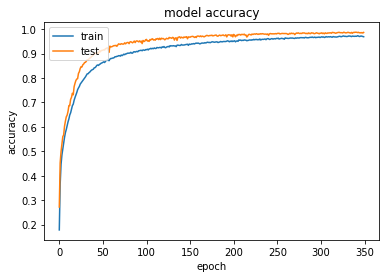

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

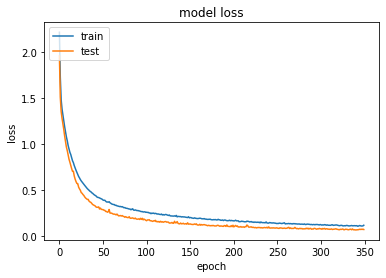

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

In [ ]:
import matplotlib.pyplot as plt

#acc= history.history['acc']

epochs_range = range(157)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend(['train', 'test'], loc='upper left')
plt.title("Accuracy")
plt.show()

KeyError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

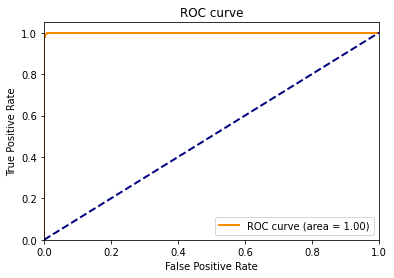

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


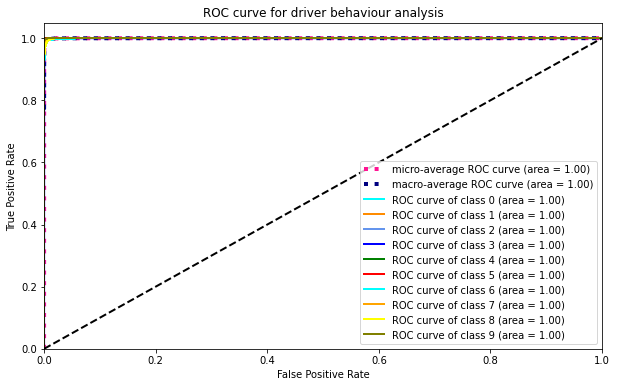

In [ ]:
# Compute macro-average ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue','green','red','cyan','orange','yellow','olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for driver behaviour analysis')
plt.legend(loc="lower right")
plt.show()

In [ ]:
n_classes = y_test.shape[1]
print(n_classes)

10


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

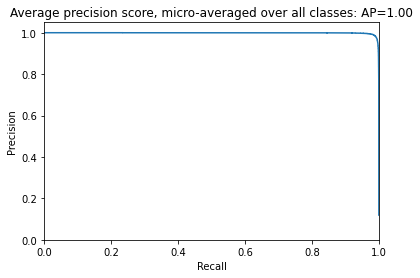

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

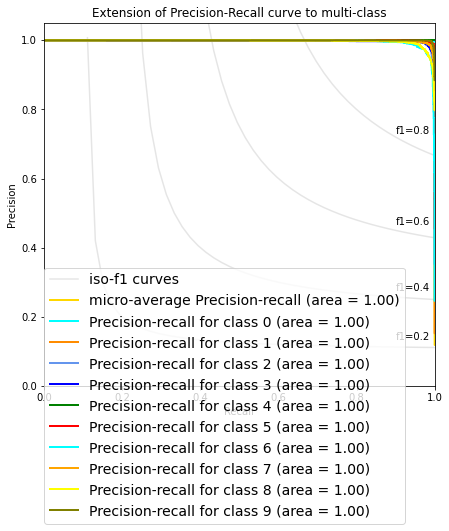

In [ ]:
#PRECISION RECALL CURVE#

from itertools import cycle
# setup plot details
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue','green','red','cyan','orange','yellow','olive'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

1. Optimize the weight and bias for the optimizer using CSA instead of adam
